# Team 5:
### Xiaoyue Wang, Sijia Huang, Yogita Sharma, Lei Cao

Please find our data and script here: https://drive.google.com/drive/folders/1jVo9nLCNcHy19khrnvHRThPAa7wTkDu5?usp=sharing

The original data source is as follows: https://data.world/nrippner/cancer-linear-regression-model-tutorial/workspace/data-dictionary



# Project Introduction


Globally, cancer is the sencond leading cause of death, which causes over 8 million deaths every year [1]. Periodical pysical examination is an effective tool to identify cancer in its early stage, which significantly lowers the cancer deaths rate. However, cancer prevention still has a long way to go, in terms of reducing incidence and mortality,[7] especially in low-income areas. 
The resources allocated to cancer detecting and management are highly unbalanced between high-income areas and low-income areas.[2,7] 


In lieu of this, equal access to and affordability of cancer care become an crucial issue attracting numerous social debates. [3,7,10] Survival rates in different areas differ for reasons such as variations in education, access to specialized care, effective treatment, as well as insurance status.[4,5] 


This “cancer divide,” with its substantially bad aftermaths and a high burden on the socio-economically disadvantaged populations,[5] has directed the global health community's attention toward cancer screening and prevention.[6,15]


According to WHO's instructions, between 30% and 50% of cancer deaths could be prevented through implementing appropriate prevention strategies in the individual level, and by adopting effective early detecton and cancer management strategies in the administrative level. [WHO] The successful cancer prevention management in the country level would substentially contribute to the WHO's third Sustainable Development Goal [SDG] of "reducing one-third of the premature mortality from non-communicable diseases through prevention and treatment and promoting mental health and well-being by 2030".[17]


To contribute to the field of cancer prevention and management, in this project, we combined state-wise U.S. cancer mortality data through 2013-2017 with state-wide residents income, poverty and health insurance status data covering the same time period,[16] to examine the causes of cancer mortality rate (calculated as (Cancer Deaths / Population) × 100,000)). Through analyzing state level cancer mortality rate and its contributing factors including cancer incidence number, 5-year cancer incidence trend, residence income, etc., we plan to create effective models that help organizations of national-level cancer management efficiently predict mortality rate based on local income, poeverty, and health insurance coverage levels[11].
We hope our study can facilitate the nonprofit groups, communitiy and governmental organizations with taking better advantages of the public area-based healthcare data as well as the census data. 


**References**: 

1. GBD 2015 Mortality and Causes of Death Collaborators. Global, regional, and national life expectancy, all-cause mortality, and cause-specific mortality for 249 causes of death, 1980–2015: a systematic analysis for the Global Burden of Disease Study 2015. Lancet. 2016;388(10053):1459–1544;

2. Horton S, Gauvreau CL. Cancer in Low- and Middle-Income Countries: An Economic Overview. In: Gelband H, Jha P, Sankaranarayanan R, Horton S, editors. Cancer: Disease Control Priorities. 3. Vol. 3. Washington, DC: The International Bank for Reconstruction and Development/The World Bank; 2015;

3. Levit L, Balogh E, Nass S, Ganz PA, editors. Committee on Improving the Quality of Cancer Care. Addressing the Challenges of an Aging Population, Board on Health Care Services, Institute of Medicine. Delivering High-Quality Cancer Care: Charting a New Course for a System in Crisis. Washington, DC: National Academies Press. 2013;

4. Coleman MP. Cancer survival: global surveillance will stimulate health policy and improve equity. Lancet. 2014;

5. Stringhini S, Sabia S, Shipley M, et al. Association of socioeconomic position with health behaviors and mortality. JAMA. 2010;

6. Vineis P, Wild CP. Global cancer patterns: causes and prevention. Lancet. 2014;

7. [The definition of the cancer mortality rate and other index.](https://seer.cancer.gov/statistics/types/mortality.html);

8. [The former research of the correlation between cancer and socioeconomic groups.](https://www.nhs.uk/news/cancer/cancer-and-socioeconomic-group/#:~:text=%E2%80%9CMiddle%20classes%20'more%20likely%20to,than%20the%20less%20well%20off.)

9. [A population cohort study in Scotland of the association between socioeconomic factors and cancer risk.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3937337/)

10. [Global trends of incidence and mortality of lung cancer:and association with socioeconomic status](https://www.nature.com/articles/s41598-017-14513-7)

11. [The Relationship Between Insurance Coverage and Cancer Care](https://www.ncbi.nlm.nih.gov/books/NBK542737/)

12. [How can people with low income prevent cancer](https://journalofethics.ama-assn.org/article/how-should-low-and-middle-income-countries-motivate-equity-cancer-prevention-and-control/2020-02)

13. [How can nonprofit help the low-income cancer patients](https://www.modernhealthcare.com/article/20170930/NEWS/170939995/community-organizations-help-low-income-cancer-patients-stay-healthy-after-treatment)

14. [How can people with low income help themselves?](https://www.cancer.org/treatment/finding-and-paying-for-treatment/understanding-financial-and-legal-matters/managing-costs/programs-and-resources-to-help-with-cancer-related-expenses.html)

15. [Cancer care can and should be expanded in LMICs( Low- and Middle-Income Countries)](https://www.ncbi.nlm.nih.gov/books/NBK343620/)

16. [Socioeconomic and racial/ethnic disparities in cancer mortality, incidence, and survival in the United States](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5376950/#:~:text=Socioeconomic%20patterns%20in%20cancer%20incidence%20are%20generally%20similar%20to%20those,in%20particular%20(Table%203).)

17. United Nations. [Accessed September 1, 2016];Sustainable Development Goals.


# Obtain data from web sources and save them as 5 csv files in the shared drive, as follows:
1. cancer_incidence.csv;
2. cancer_mortality.csv;
3. poverty.csv;
4. income.csv;
5. healthinsurance.csv

***Note: as it's time consuming, don't re-run this part unless necessary. ***


### Preparation

In [ ]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# datadotworld SDK
!pip install datadotworld
!pip install datadotworld[pandas]
import datadotworld as ddw

!pip -U kombu==3.5.x

!pip install watermark
% load_ext watermark
# % watermark -v -p pandas,numpy,matplotlib,datadotworld

import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 163kB 2.7MB/s 
     |████████████████████████████████| 92kB 6.0MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 71kB 4.3MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 133kB 8.1MB/s 
     |████████████████████████████████| 245kB 8.6MB/s 
     |████████████████████████████████| 133kB 12.2MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 6.7MB 11.1MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10769 sha256=7aa8b9bb405030182d4428767422064d6dbf0a181c38372855f6afa9292ad770
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-cp36-none-any.whl size=7382 sha256=55686862dc3dbf5bf520180ac617b69bed293fb


Usage:   
  pip3 <command> [options]

no such option: -U


In [ ]:
# Enter your API token to access the data
!dw configure

API token (obtained at: https://data.world/settings/advanced): !dw configure


### The Cancer Data (2 datasets)

In [ ]:
# retrieve the cancer data from data.world

mortdf = ddw.query('nrippner/cancer-analysis-hackathon-challenge',
                  'SELECT * FROM death').dataframe

incddf = ddw.query('nrippner/cancer-analysis-hackathon-challenge',
                        'SELECT * FROM incd').dataframe

mortdf = mortdf[mortdf.fips.notnull()]
incddf = incddf[incddf.fips.notnull()]

mortdf['FIPS'] = mortdf.fips.apply(lambda x: str(int(x)))\
                            .astype(np.object_)\
                            .str.pad(5, 'left', '0')

incddf['FIPS'] = incddf.fips.apply(lambda x: str(int(x)))\
                            .astype(np.object_)\
                            .str.pad(5, 'left', '0')

incddf.drop(incddf.columns[[0,3,4,7,8,9]].values, axis=1, inplace=True)
mortdf.drop(mortdf.columns[[0,2,4,5,7,8,9,10]], axis=1, inplace=True)

incddf.rename(columns={incddf.columns[1]:'Incidence_Rate',
                       incddf.columns[2]:'Avg_Ann_Incidence'}, inplace=True)
mortdf.rename(columns={mortdf.columns[1]:'Mortality_Rate',
                       mortdf.columns[2]:'Avg_Ann_Deaths'}, inplace=True)

RuntimeError: ignored

In [ ]:
!pip3 install --upgrade pandas==0.24.2

Requirement already up-to-date: pandas==0.24.2 in /usr/local/lib/python3.6/dist-packages (0.24.2)


In [ ]:
# save it in shared drive
incddf.to_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/cancer_incidence.csv')

In [ ]:
# save it in shared drive
mortdf.to_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/cancer_mortality.csv')

### The Poverty Data

In [ ]:
# Retrieve a list of table names (by state)
pov = ddw.load_dataset('uscensusbureau/acs-2015-5-e-poverty')

tables = []
for i in pov.tables:
    if len(i) == 2:
        tables.append(i)

# remove Puerto Rico
tables.remove('pr')

In [ ]:
print(len(tables))
np.array(tables)

51


array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'], dtype='<U2')

In [ ]:
# Retrieve the Census poverty data from data.world
start = time.time()

# a string - the poverty columns we want from the Census ACS 
cols = '`State`, `StateFIPS`, `CountyFIPS`, `AreaName`, `B17001_002`, `B17001_003`,'\
       '`B17001_017`'

# call the data for each state and concatenate
for i, state in enumerate(tables):
    if i == 0:
        povdf = ddw.query('uscensusbureau/acs-2015-5-e-poverty',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % cols).dataframe 
    else:
        df = ddw.query('uscensusbureau/acs-2015-5-e-poverty',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (cols, state.upper())).dataframe
    
        povdf = pd.concat([povdf, df], ignore_index=True)

end = time.time()

print(end - start)


# Add leading zeros to the state and county FIPS codes
povdf['StateFIPS'] = povdf.StateFIPS.astype(np.object_)\
                                    .apply(lambda x: str(x))\
                                    .str.pad(2, 'left', '0')
povdf['CountyFIPS'] = povdf.CountyFIPS.astype(np.object_)\
                                      .apply(lambda x: str(x))\
                                      .str.pad(3, 'left', '0')

povdf.rename(columns={'B17001_002':'All_Poverty', 'B17001_003':'M_Poverty', 'B17001_017':'F_Poverty'},
             inplace=True)

104.84459114074707


In [ ]:
# save to our drive, just in case...
povdf.to_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/poverty.csv')

### The Income Data


In [ ]:
cols = '`StateFIPS`, `CountyFIPS`,'\
       '`B19013_001`, `B19013A_001`, `B19013B_001`, `B19013C_001`, `B19013D_001`,'\
       '`B19013I_001`'

start = time.time()

for i, state in enumerate(tables):
    if i == 0:
        incomedf = ddw.query('uscensusbureau/acs-2015-5-e-income',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % cols).dataframe 
    else:
        df = ddw.query('uscensusbureau/acs-2015-5-e-income',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (cols, state.upper())).dataframe
        incomedf = pd.concat([incomedf, df], ignore_index=True)

        end = time.time()

print(end - start)

incomedf['StateFIPS'] = incomedf.StateFIPS.astype(np.object_)\
                                .apply(lambda x: str(x))\
                                .str.pad(2, 'left', '0')
incomedf['CountyFIPS'] = incomedf.CountyFIPS.astype(np.object_)\
                                 .apply(lambda x: str(x))\
                                 .str.pad(3, 'left', '0')

incomedf.rename(columns={'B19013_001':'Med_Income', 'B19013A_001':'Med_Income_White', 
                         'B19013B_001':'Med_Income_Black', 'B19013C_001':'Med_Income_Nat_Am',
                         'B19013D_001':'Med_Income_Asian', 'B19013I_001':'Hispanic'}, inplace=True)

81.29773259162903


In [ ]:
# save to our drive
incomedf.to_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/income.csv')

### The Health Insurance Data

In [ ]:
cols = '`StateFIPS`, `CountyFIPS`,'\
       '`B27001_004`, `B27001_005`, `B27001_007`, `B27001_008`,'\
       '`B27001_010`, `B27001_011`, `B27001_013`, `B27001_014`,'\
       '`B27001_016`, `B27001_017`, `B27001_019`, `B27001_020`,'\
       '`B27001_022`, `B27001_023`, `B27001_025`, `B27001_026`,'\
       '`B27001_028`, `B27001_029`, `B27001_032`, `B27001_033`,'\
       '`B27001_035`, `B27001_036`, `B27001_038`, `B27001_039`,'\
       '`B27001_041`, `B27001_042`, `B27001_044`, `B27001_045`,'\
       '`B27001_047`, `B27001_048`, `B27001_050`, `B27001_051`,'\
       '`B27001_053`, `B27001_054`, `B27001_056`, `B27001_057`'
# male <= 029   

start = time.time()

for i, state in enumerate(tables):
    if i == 0:
        hinsdf = ddw.query('uscensusbureau/acs-2015-5-e-healthinsurance',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % cols).dataframe 
   
    else:
        df = ddw.query('uscensusbureau/acs-2015-5-e-healthinsurance',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (cols, state.upper())).dataframe
        hinsdf = pd.concat([hinsdf, df], ignore_index=True)

end = time.time()
print(end - start)

hinsdf['StateFIPS'] = hinsdf.StateFIPS.astype(np.object_)\
                                      .apply(lambda x: str(x))\
                                      .str.pad(2, 'left', '0')
hinsdf['CountyFIPS'] = hinsdf.CountyFIPS.astype(np.object_)\
                                        .apply(lambda x: str(x))\
                                        .str.pad(3, 'left', '0')

69.57198333740234


In [ ]:
# columns representing males' health insurance statistics
males = ['`B27001_004`', '`B27001_005`', '`B27001_007`', '`B27001_008`',
           '`B27001_010`', '`B27001_011`', '`B27001_013`', '`B27001_014`',
           '`B27001_016`', '`B27001_017`', '`B27001_019`', '`B27001_020`',
           '`B27001_022`', '`B27001_023`', '`B27001_025`', '`B27001_026`',
           '`B27001_028`', '`B27001_029`']

# females' health insurance statistics
females = ['`B27001_032`', '`B27001_033`', '`B27001_035`', '`B27001_036`', 
           '`B27001_038`', '`B27001_039`', '`B27001_041`', '`B27001_042`', 
           '`B27001_044`', '`B27001_045`', '`B27001_047`', '`B27001_048`', 
           '`B27001_050`', '`B27001_051`', '`B27001_053`', '`B27001_054`', 
           '`B27001_056`', '`B27001_057`']

# separate the "with" and "without" health insurance columns
males_with = []
males_without = []
females_with = []
females_without = []

# strip the backticks
for i, j in enumerate(males):
    if i % 2 == 0:
        males_with.append(j.replace('`', ''))
    else:
        males_without.append(j.replace('`', ''))
        
for i, j in enumerate(females):
    if i % 2 == 0:
        females_with.append(j.replace('`', ''))
    else:
        females_without.append(j.replace('`', ''))

# Create features that sum all the individual age group
clist = [males_with, males_without, females_with, females_without]
newcols = ['M_With', 'M_Without', 'F_With', 'F_Without'] 

for col in newcols:
    hinsdf[col] = 0

for i in males_with:
    hinsdf['M_With'] += hinsdf[i]  
for i in males_without:
    hinsdf['M_Without'] += hinsdf[i]
for i in females_with:
    hinsdf['F_With'] += hinsdf[i]
for i in females_without:
    hinsdf['F_Without'] += hinsdf[i]

hinsdf['All_With'] = hinsdf.M_With + hinsdf.F_With
hinsdf['All_Without'] = hinsdf.M_Without + hinsdf.F_Without

# Remove all the individual age group variables
# but, save them as a df called hinsdf_extra (just in case)
hinsdf_extra = df.loc[:, df.columns[df.columns.str.contains('B27001')].values]
hinsdf.drop(df.columns[df.columns.str.contains('B27001')].values, axis=1, inplace=True)

In [ ]:
# save to our drive
hinsdf.to_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/healthinsurance.csv')

# Merge and clean the datasets (in the data folder)

**General Process**:
1. merge the 5 csv files;
2. delete unnecessary columns;

**Description**:

  We accessed the cancer, income, poverty, and health insurance datasets via data world’s API (source: https://data.world/nrippner/cancer-linear-regression-model-tutorial/workspace/data-dictionary) and saved them locally. 
  
  After preparing data and dropping unuseful variables, the five datasets were merged on FIPS (State + County FIPS) and we eventually got a dataset with 2812 rows and 13 columns for modeling. 
  
  The variables kept are:

* Mortality_Rate (the target variable), 
* Avg_Ann_Deaths (average annual deaths), 
* Incidence_Rate, 
* Avg_Ann_Incidence (average annual incidence), 
* recent_trend (recent trend of incidence), 
* State, 
* All_Poverty (both males and females reported below poverty line), 
* All_With (both males and females with health insurance), 
* Med_Income (median income for all ethnicities), 
* Med_Income_Black (median income for black), 
* Med_Income_Nat_Am (median income for native American), 
* Med_Income_Asian (median income for Asian), 
* Hispanic (median income for Hispanic). 



In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### cancer_incidence.csv


In [ ]:
cancer_inci = pd.read_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/cancer_incidence.csv')

In [ ]:
cancer_inci.head()

,Unnamed: 0,fips,Incidence_Rate,Avg_Ann_Incidence,recent_trend,FIPS
0,0,0,62.4,214614,falling,0
1,1,1001,74.9,43,stable,1001
2,2,1003,66.9,170,stable,1003
3,3,1005,74.6,25,stable,1005
4,4,1007,86.4,23,stable,1007


In [ ]:
cancer_inci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3141 non-null   int64 
 1   fips               3141 non-null   int64 
 2   Incidence_Rate     3141 non-null   object
 3   Avg_Ann_Incidence  3141 non-null   object
 4   recent_trend       3141 non-null   object
 5   FIPS               3141 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.4+ KB


In [ ]:
# drop unnecessary columns
cancer_inci=cancer_inci.drop(['Unnamed: 0',
                              'fips'],axis=1)
cancer_inci.info() # (3141,4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Incidence_Rate     3141 non-null   object
 1   Avg_Ann_Incidence  3141 non-null   object
 2   recent_trend       3141 non-null   object
 3   FIPS               3141 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 98.3+ KB


In [ ]:
# pad leading 0s to FIPS to make it 5 digits
cancer_inci['FIPS']=cancer_inci['FIPS'].astype(str)
cancer_inci['FIPS']=cancer_inci['FIPS'].str.strip()
cancer_inci['FIPS']=cancer_inci['FIPS'].str.zfill(5)
cancer_inci['FIPS'].unique()

array(['00000', '01001', '01003', ..., '56041', '56043', '56045'],
      dtype=object)

In [ ]:
# drop the first row-as we don't need nation-wide data
cancer_inci=cancer_inci.drop(cancer_inci.index[0])
cancer_inci.head()

,Incidence_Rate,Avg_Ann_Incidence,recent_trend,FIPS
1,74.9,43,stable,01001
2,66.9,170,stable,01003
3,74.6,25,stable,01005
4,86.4,23,stable,01007
5,69.7,51,stable,01009


In [ ]:
# deal with incidence rate column
cancer_inci.iloc[:,0].unique() 
  # eliminating #
a=[]
for i in cancer_inci['Incidence_Rate']:
  i=i.split('#')[0]
  a.append(i)

cancer_inci['Incidence_Rate']=a
cancer_inci.iloc[:,0].unique()

array(['74.9', '66.9', '74.6', '86.4', '69.7', '65.8', '58.3', '84.2',
       '75.4', '82.4', '73.9', '49.2', '69.5', '83.3', '71.5', '75.9',
       '73.5', '82.6', '83', '61.5', '69.6', '76.7', '76.2', '60.8',
       '78.1', '75.5', '81.9', '77.3', '72.4', '90.3', '87.9', '71',
       '66.5', '70.8', '80.9', '65.1', '80.4', '69.3', '88.1', '59.4',
       '73.4', '57.6', '57.9', '64.8', '61.6', '74.2', '79.4', '62.3',
       '61', '83.1', '65.6', '61.8', '78.7', '74.7', '57.1', '55.5', '74',
       '70.5', '72.3', '98.3', '74.8', '73.2', '90.8', '*', '62.7',
       '58.1', '35.1', '64.9', '88.3', '103.6', '153.4', '67.6', '81.4',
       '44', '76.8', '66.1', '78.8', '22.9', '46.9', '36.7', '54.3',
       '45.5', '64', '54.4', '52.2', '76.6', '39.6', '50.9', '36.1',
       '51.9', '48', '85.9', '77', '85.6', '56.4', '67.7', '86.3', '82.5',
       '59.1', '76.4', '71.6', '108.7', '83.6', '77.5', '72', '75',
       '79.1', '75.6', '82.2', '79.2', '77.1', '64.7', '80.6', '96.1',
       '89

In [ ]:
cancer_inci.info() #(3140,4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 1 to 3140
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Incidence_Rate     3140 non-null   object
 1   Avg_Ann_Incidence  3140 non-null   object
 2   recent_trend       3140 non-null   object
 3   FIPS               3140 non-null   object
dtypes: object(4)
memory usage: 122.7+ KB


### cancer_mortality.csv

In [ ]:
cancer_mortality=pd.read_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/cancer_mortality.csv')
cancer_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3141 non-null   int64 
 1   fips            3141 non-null   int64 
 2   Mortality_Rate  3141 non-null   object
 3   Avg_Ann_Deaths  3141 non-null   object
 4   FIPS            3141 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 122.8+ KB


In [ ]:
cancer_mortality.head()

,Unnamed: 0,fips,Mortality_Rate,Avg_Ann_Deaths,FIPS
0,0,0,46,"157,376",0
1,1,21193,125.6,43,21193
2,2,21197,125.3,18,21197
3,3,2185,124.9,5,2185
4,4,21189,118.5,8,21189


In [ ]:
# drop unnecessary columns
cancer_mortality=cancer_mortality.drop(['Unnamed: 0',
                                        'fips'],axis=1)
cancer_mortality.info() # (3141,4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mortality_Rate  3141 non-null   object
 1   Avg_Ann_Deaths  3141 non-null   object
 2   FIPS            3141 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 73.7+ KB


In [ ]:
# drop first row- do not need nation-wide data
cancer_mortality=cancer_mortality.drop([cancer_mortality.index[0]])

In [ ]:
# pad leading 0s to FIPS to make it 5 digits
cancer_mortality['FIPS']=cancer_mortality['FIPS'].astype(str)
cancer_mortality['FIPS']=cancer_mortality['FIPS'].str.strip()
cancer_mortality['FIPS']=cancer_mortality['FIPS'].str.zfill(5)
cancer_mortality['FIPS'].unique()



array(['21193', '21197', '02185', ..., '48505', '48507', '46137'],
      dtype=object)

In [ ]:
cancer_mortality.info() #(3140,3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 1 to 3140
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mortality_Rate  3140 non-null   object
 1   Avg_Ann_Deaths  3140 non-null   object
 2   FIPS            3140 non-null   object
dtypes: object(3)
memory usage: 98.1+ KB


### poverty.csv

In [ ]:
poverty=pd.read_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/poverty.csv')
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3142 non-null   int64 
 1   State        3142 non-null   object
 2   StateFIPS    3142 non-null   int64 
 3   CountyFIPS   3142 non-null   int64 
 4   AreaName     3142 non-null   object
 5   All_Poverty  3142 non-null   int64 
 6   M_Poverty    3142 non-null   int64 
 7   F_Poverty    3142 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 196.5+ KB


In [ ]:
poverty.head()

,Unnamed: 0,State,StateFIPS,CountyFIPS,AreaName,All_Poverty,M_Poverty,F_Poverty
0,0,AK,2,13,"Aleutians East Borough, Alaska",553,334,219
1,1,AK,2,16,"Aleutians West Census Area, Alaska",499,273,226
2,2,AK,2,20,"Anchorage Municipality, Alaska",23914,10698,13216
3,3,AK,2,50,"Bethel Census Area, Alaska",4364,2199,2165
4,4,AK,2,60,"Bristol Bay Borough, Alaska",69,33,36


In [ ]:
poverty.describe()

,Unnamed: 0,StateFIPS,CountyFIPS,All_Poverty,M_Poverty,F_Poverty
count,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000
mean,1570.500000,30.280076,103.572884,1.519702e+04,6814.293762,8382.728199
std,907.161599,15.144339,107.704060,5.450572e+04,24689.346443,29830.068800
min,0.000000,1.000000,1.000000,1.000000e+01,5.000000,5.000000
25%,785.250000,18.000000,35.000000,1.727250e+03,754.250000,956.000000
50%,1570.500000,29.000000,79.000000,4.278500e+03,1917.000000,2368.000000
75%,2355.750000,45.000000,133.000000,1.033475e+04,4670.000000,5810.250000
max,3141.000000,56.000000,840.000000,1.800265e+06,823612.000000,976653.000000


In [ ]:
# drop unncessary columns
poverty=poverty.drop(['Unnamed: 0','AreaName'],axis=1)
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        3142 non-null   object
 1   StateFIPS    3142 non-null   int64 
 2   CountyFIPS   3142 non-null   int64 
 3   All_Poverty  3142 non-null   int64 
 4   M_Poverty    3142 non-null   int64 
 5   F_Poverty    3142 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 147.4+ KB


In [ ]:
# deal with the FIPS
poverty['StateFIPS']=poverty['StateFIPS'].astype(str)
poverty['StateFIPS']=poverty['StateFIPS'].str.zfill(2)
poverty['CountyFIPS']=poverty['CountyFIPS'].astype(str)
poverty['CountyFIPS']=poverty['CountyFIPS'].str.zfill(3)

poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        3142 non-null   object
 1   StateFIPS    3142 non-null   object
 2   CountyFIPS   3142 non-null   object
 3   All_Poverty  3142 non-null   int64 
 4   M_Poverty    3142 non-null   int64 
 5   F_Poverty    3142 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.4+ KB


In [ ]:
poverty['FIPS']=poverty['StateFIPS']+poverty['CountyFIPS']
poverty['FIPS'].unique()

array(['02013', '02016', '02020', ..., '56041', '56043', '56045'],
      dtype=object)

In [ ]:
# drop unnecessary columns
poverty=poverty.drop(['StateFIPS','CountyFIPS'],axis=1)
poverty.info() # (3142,5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        3142 non-null   object
 1   All_Poverty  3142 non-null   int64 
 2   M_Poverty    3142 non-null   int64 
 3   F_Poverty    3142 non-null   int64 
 4   FIPS         3142 non-null   object
dtypes: int64(3), object(2)
memory usage: 122.9+ KB


### healthinsurance.csv

In [ ]:
insur=pd.read_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/healthinsurance.csv')
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   3142 non-null   int64
 1   StateFIPS    3142 non-null   int64
 2   CountyFIPS   3142 non-null   int64
 3   M_With       3142 non-null   int64
 4   M_Without    3142 non-null   int64
 5   F_With       3142 non-null   int64
 6   F_Without    3142 non-null   int64
 7   All_With     3142 non-null   int64
 8   All_Without  3142 non-null   int64
dtypes: int64(9)
memory usage: 221.0 KB


In [ ]:
insur.head()

,Unnamed: 0,StateFIPS,CountyFIPS,M_With,M_Without,F_With,F_Without,All_With,All_Without
0,0,2,13,876,1317,566,540,1442,1857
1,1,2,16,2470,769,1707,564,4177,1333
2,2,2,20,120747,23245,122426,21393,243173,44638
3,3,2,50,6396,2708,6627,1774,13023,4482
4,4,2,60,419,124,349,67,768,191


In [ ]:
# deal with the FIPS
insur['StateFIPS']=insur['StateFIPS'].astype(str)
insur['StateFIPS']=insur['StateFIPS'].str.zfill(2)
insur['CountyFIPS']=insur['CountyFIPS'].astype(str)
insur['CountyFIPS']=insur['CountyFIPS'].str.zfill(3)

insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3142 non-null   int64 
 1   StateFIPS    3142 non-null   object
 2   CountyFIPS   3142 non-null   object
 3   M_With       3142 non-null   int64 
 4   M_Without    3142 non-null   int64 
 5   F_With       3142 non-null   int64 
 6   F_Without    3142 non-null   int64 
 7   All_With     3142 non-null   int64 
 8   All_Without  3142 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 221.0+ KB


In [ ]:
insur['FIPS']=insur['StateFIPS']+insur['CountyFIPS']
insur['FIPS'].unique()

array(['02013', '02016', '02020', ..., '56041', '56043', '56045'],
      dtype=object)

In [ ]:
# drop unnecessary columns
insur=insur.drop(['Unnamed: 0','StateFIPS','CountyFIPS'],axis=1)
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   M_With       3142 non-null   int64 
 1   M_Without    3142 non-null   int64 
 2   F_With       3142 non-null   int64 
 3   F_Without    3142 non-null   int64 
 4   All_With     3142 non-null   int64 
 5   All_Without  3142 non-null   int64 
 6   FIPS         3142 non-null   object
dtypes: int64(6), object(1)
memory usage: 172.0+ KB


### income.csv

In [ ]:
income=pd.read_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/income.csv')
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3142 non-null   int64  
 1   StateFIPS          3142 non-null   int64  
 2   CountyFIPS         3142 non-null   int64  
 3   Med_Income         3141 non-null   float64
 4   Med_Income_White   3140 non-null   float64
 5   Med_Income_Black   1926 non-null   float64
 6   Med_Income_Nat_Am  1481 non-null   float64
 7   Med_Income_Asian   1381 non-null   float64
 8   Hispanic           2458 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 221.0 KB


In [ ]:
income.head()

,Unnamed: 0,StateFIPS,CountyFIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic
0,0,2,13,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0
1,1,2,16,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0
2,2,2,20,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0
3,3,2,50,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0
4,4,2,60,79750.0,88000.0,NaN,63333.0,NaN,25625.0


In [ ]:
# deal with the FIPS
income['StateFIPS']=income['StateFIPS'].astype(str)
income['StateFIPS']=income['StateFIPS'].str.zfill(2)
income['CountyFIPS']=income['CountyFIPS'].astype(str)
income['CountyFIPS']=income['CountyFIPS'].str.zfill(3)

income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3142 non-null   int64  
 1   StateFIPS          3142 non-null   object 
 2   CountyFIPS         3142 non-null   object 
 3   Med_Income         3141 non-null   float64
 4   Med_Income_White   3140 non-null   float64
 5   Med_Income_Black   1926 non-null   float64
 6   Med_Income_Nat_Am  1481 non-null   float64
 7   Med_Income_Asian   1381 non-null   float64
 8   Hispanic           2458 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 221.0+ KB


In [ ]:
income['FIPS']=income['StateFIPS']+income['CountyFIPS']
income['FIPS'].unique

<bound method Series.unique of 0       02013
1       02016
2       02020
3       02050
4       02060
        ...  
3137    56037
3138    56039
3139    56041
3140    56043
3141    56045
Name: FIPS, Length: 3142, dtype: object>

In [ ]:
# drop unnecessary columns
income=income.drop(['Unnamed: 0','StateFIPS','CountyFIPS'],axis=1)
income.info() #(3142,7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Med_Income         3141 non-null   float64
 1   Med_Income_White   3140 non-null   float64
 2   Med_Income_Black   1926 non-null   float64
 3   Med_Income_Nat_Am  1481 non-null   float64
 4   Med_Income_Asian   1381 non-null   float64
 5   Hispanic           2458 non-null   float64
 6   FIPS               3142 non-null   object 
dtypes: float64(6), object(1)
memory usage: 172.0+ KB


### Merge

In [ ]:
# mortality+inci
df=pd.merge(cancer_mortality,cancer_inci,
            how='left',
            on=['FIPS'])
df.info() # (3140,6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Mortality_Rate     3140 non-null   object
 1   Avg_Ann_Deaths     3140 non-null   object
 2   FIPS               3140 non-null   object
 3   Incidence_Rate     3140 non-null   object
 4   Avg_Ann_Incidence  3140 non-null   object
 5   recent_trend       3140 non-null   object
dtypes: object(6)
memory usage: 171.7+ KB


In [ ]:
df.head()

,Mortality_Rate,Avg_Ann_Deaths,FIPS,Incidence_Rate,Avg_Ann_Incidence,recent_trend
0,125.6,43,21193,139.7,49,falling
1,125.3,18,21197,152.9,23,stable
2,124.9,5,02185,153.4,6,stable
3,118.5,8,21189,148.1,9,stable
4,113.5,19,12125,203.7,35,stable


In [ ]:
# df+poverty
df=pd.merge(df,poverty,
            how='left',
            on=['FIPS'])
df.info() # (3140,10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     3140 non-null   object 
 1   Avg_Ann_Deaths     3140 non-null   object 
 2   FIPS               3140 non-null   object 
 3   Incidence_Rate     3140 non-null   object 
 4   Avg_Ann_Incidence  3140 non-null   object 
 5   recent_trend       3140 non-null   object 
 6   State              3134 non-null   object 
 7   All_Poverty        3134 non-null   float64
 8   M_Poverty          3134 non-null   float64
 9   F_Poverty          3134 non-null   float64
dtypes: float64(3), object(7)
memory usage: 269.8+ KB


In [ ]:
# df+insur
df=pd.merge(df,insur,
            how='left',
            on=['FIPS'])
df.info() # (3140,16)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     3140 non-null   object 
 1   Avg_Ann_Deaths     3140 non-null   object 
 2   FIPS               3140 non-null   object 
 3   Incidence_Rate     3140 non-null   object 
 4   Avg_Ann_Incidence  3140 non-null   object 
 5   recent_trend       3140 non-null   object 
 6   State              3134 non-null   object 
 7   All_Poverty        3134 non-null   float64
 8   M_Poverty          3134 non-null   float64
 9   F_Poverty          3134 non-null   float64
 10  M_With             3134 non-null   float64
 11  M_Without          3134 non-null   float64
 12  F_With             3134 non-null   float64
 13  F_Without          3134 non-null   float64
 14  All_With           3134 non-null   float64
 15  All_Without        3134 non-null   float64
dtypes: float64(9), object(7)

In [ ]:
# df+income
df=pd.merge(df,income,
            how='left',
            on=['FIPS'])
df.info() # (3140,22)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     3140 non-null   object 
 1   Avg_Ann_Deaths     3140 non-null   object 
 2   FIPS               3140 non-null   object 
 3   Incidence_Rate     3140 non-null   object 
 4   Avg_Ann_Incidence  3140 non-null   object 
 5   recent_trend       3140 non-null   object 
 6   State              3134 non-null   object 
 7   All_Poverty        3134 non-null   float64
 8   M_Poverty          3134 non-null   float64
 9   F_Poverty          3134 non-null   float64
 10  M_With             3134 non-null   float64
 11  M_Without          3134 non-null   float64
 12  F_With             3134 non-null   float64
 13  F_Without          3134 non-null   float64
 14  All_With           3134 non-null   float64
 15  All_Without        3134 non-null   float64
 16  Med_Income         3133 

In [ ]:
# save the merged data into our drive, just in case...
df.to_csv('/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/merged.csv')

In [ ]:
df.head()

,Mortality_Rate,Avg_Ann_Deaths,FIPS,Incidence_Rate,Avg_Ann_Incidence,recent_trend,State,All_Poverty,M_Poverty,F_Poverty,M_With,M_Without,F_With,F_Without,All_With,All_Without,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic
0,125.6,43,21193,139.7,49,falling,KY,6894.0,2903.0,3991.0,11544.0,1921.0,11982.0,1944.0,23526.0,3865.0,32667.0,31911.0,93000.0,NaN,NaN,NaN
1,125.3,18,21197,152.9,23,stable,KY,3392.0,1361.0,2031.0,5131.0,829.0,5551.0,714.0,10682.0,1543.0,29736.0,30476.0,NaN,NaN,NaN,16688.0
2,124.9,5,02185,153.4,6,stable,AK,976.0,532.0,444.0,4847.0,1248.0,2579.0,910.0,7426.0,2158.0,72576.0,86250.0,107500.0,59554.0,126964.0,88563.0
3,118.5,8,21189,148.1,9,stable,KY,1710.0,810.0,900.0,1879.0,247.0,2108.0,300.0,3987.0,547.0,20985.0,20618.0,NaN,NaN,NaN,NaN
4,113.5,19,12125,203.7,35,stable,FL,2002.0,814.0,1188.0,4013.0,645.0,4612.0,749.0,8625.0,1394.0,39163.0,40244.0,28516.0,86071.0,NaN,NaN


# EDA, Visualization, and Further Data Preparation

**General processes**:
1. generated profile report, based on which 8 columns with high correlation (>0.9) with other existing predictor columns are deleted.
2. visulized the columns left to find insights (for further details, see the following column based blocks).
2. changed the datatype of the existing 14 columns and recoded missing values in the both numerical and categorical columns. 

  **In terms of dealing with missing values**:
  
  1) We dropped the rows with missing values in the target variable (Mortality_Rate);
   
  2) For missing values in other numerical columns, we imputed them with mean of the column respectively;
  
  3) For missing values in categorical columns, we imputed them as 'Unknown'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     3140 non-null   object 
 1   Avg_Ann_Deaths     3140 non-null   object 
 2   FIPS               3140 non-null   object 
 3   Incidence_Rate     3140 non-null   object 
 4   Avg_Ann_Incidence  3140 non-null   object 
 5   recent_trend       3140 non-null   object 
 6   State              3134 non-null   object 
 7   All_Poverty        3134 non-null   float64
 8   M_Poverty          3134 non-null   float64
 9   F_Poverty          3134 non-null   float64
 10  M_With             3134 non-null   float64
 11  M_Without          3134 non-null   float64
 12  F_With             3134 non-null   float64
 13  F_Without          3134 non-null   float64
 14  All_With           3134 non-null   float64
 15  All_Without        3134 non-null   float64
 16  Med_Income         3133 

In [ ]:
# profile report
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(outputfile="/content/drive/Shared drives/Deep Learning Group 5/Project #1/data/profile_merged.html")

In [ ]:
# delete unnecessary columns based on correlation check above
df=df.drop(['M_Poverty','F_Poverty',
            'M_With','F_With',
            'M_Without','F_Without',
            'All_Without',
            'Med_Income_White'],axis=1)
df.info() #(3140,14)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     3140 non-null   object 
 1   Avg_Ann_Deaths     3140 non-null   object 
 2   FIPS               3140 non-null   object 
 3   Incidence_Rate     3140 non-null   object 
 4   Avg_Ann_Incidence  3140 non-null   object 
 5   recent_trend       3140 non-null   object 
 6   State              3134 non-null   object 
 7   All_Poverty        3134 non-null   float64
 8   All_With           3134 non-null   float64
 9   Med_Income         3133 non-null   float64
 10  Med_Income_Black   1924 non-null   float64
 11  Med_Income_Nat_Am  1474 non-null   float64
 12  Med_Income_Asian   1377 non-null   float64
 13  Hispanic           2453 non-null   float64
dtypes: float64(7), object(7)
memory usage: 368.0+ KB


#### Mortality_Rate--Target Variable

The distribution of Mortality Rate is slightly right-skewed, the most frequent cancer mortality rate among all counties across the U.S. is around 50 per 100,000 people, while the highest mortality rate is around 125 per 100,000 people. 



In [ ]:
# mortality rate-- traget variable
# drop rows with missing value in target variable
index_names=df[df['Mortality_Rate']=='*'].index
index_names # 328 rows

df.drop(index_names,inplace=True)
df.info() # (2812,14)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   object 
 1   Avg_Ann_Deaths     2812 non-null   object 
 2   FIPS               2812 non-null   object 
 3   Incidence_Rate     2812 non-null   object 
 4   Avg_Ann_Incidence  2812 non-null   object 
 5   recent_trend       2812 non-null   object 
 6   State              2809 non-null   object 
 7   All_Poverty        2809 non-null   float64
 8   All_With           2809 non-null   float64
 9   Med_Income         2809 non-null   float64
 10  Med_Income_Black   1890 non-null   float64
 11  Med_Income_Nat_Am  1401 non-null   float64
 12  Med_Income_Asian   1359 non-null   float64
 13  Hispanic           2272 non-null   float64
dtypes: float64(7), object(7)
memory usage: 329.5+ KB


In [ ]:
# change target variable into numeric
df['Mortality_Rate']=df['Mortality_Rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   object 
 2   FIPS               2812 non-null   object 
 3   Incidence_Rate     2812 non-null   object 
 4   Avg_Ann_Incidence  2812 non-null   object 
 5   recent_trend       2812 non-null   object 
 6   State              2809 non-null   object 
 7   All_Poverty        2809 non-null   float64
 8   All_With           2809 non-null   float64
 9   Med_Income         2809 non-null   float64
 10  Med_Income_Black   1890 non-null   float64
 11  Med_Income_Nat_Am  1401 non-null   float64
 12  Med_Income_Asian   1359 non-null   float64
 13  Hispanic           2272 non-null   float64
dtypes: float64(8), object(6)
memory usage: 329.5+ KB


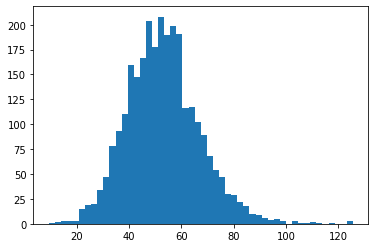

In [ ]:
# distribution 
import matplotlib.pyplot as plt

plt.hist(df['Mortality_Rate'],bins=50)
plt.show()

#### Avg_Ann_Death

In [ ]:
# Avg_Ann_Death
  # eliminate * 
df['Avg_Ann_Deaths']=df['Avg_Ann_Deaths'].replace('*',np.nan)
  # eliminate comma
df['Avg_Ann_Deaths']=df['Avg_Ann_Deaths'].str.replace(',','')

df['Avg_Ann_Deaths']=df['Avg_Ann_Deaths'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   FIPS               2812 non-null   object 
 3   Incidence_Rate     2812 non-null   object 
 4   Avg_Ann_Incidence  2812 non-null   object 
 5   recent_trend       2812 non-null   object 
 6   State              2809 non-null   object 
 7   All_Poverty        2809 non-null   float64
 8   All_With           2809 non-null   float64
 9   Med_Income         2809 non-null   float64
 10  Med_Income_Black   1890 non-null   float64
 11  Med_Income_Nat_Am  1401 non-null   float64
 12  Med_Income_Asian   1359 non-null   float64
 13  Hispanic           2272 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 329.5+ KB


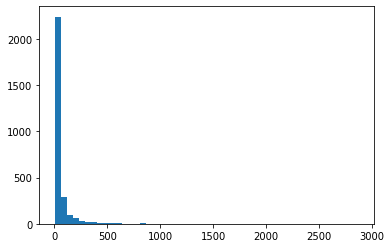

In [ ]:
# distribution
plt.hist(df['Avg_Ann_Deaths'],bins=50)
plt.show()

#### Incidence_Rate
Among all the counties across the U.S., the most frequent cancer incidence rate is around 75 per 100,000 person. 



In [ ]:
# Incidence_Rate
df['Incidence_Rate']=df['Incidence_Rate'].replace('*',np.nan)
df['Incidence_Rate']=df['Incidence_Rate'].replace('_',np.nan)
df['Incidence_Rate']=df['Incidence_Rate'].replace('__',np.nan)
df['Incidence_Rate']=df['Incidence_Rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   FIPS               2812 non-null   object 
 3   Incidence_Rate     2644 non-null   float64
 4   Avg_Ann_Incidence  2812 non-null   object 
 5   recent_trend       2812 non-null   object 
 6   State              2809 non-null   object 
 7   All_Poverty        2809 non-null   float64
 8   All_With           2809 non-null   float64
 9   Med_Income         2809 non-null   float64
 10  Med_Income_Black   1890 non-null   float64
 11  Med_Income_Nat_Am  1401 non-null   float64
 12  Med_Income_Asian   1359 non-null   float64
 13  Hispanic           2272 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 329.5+ KB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


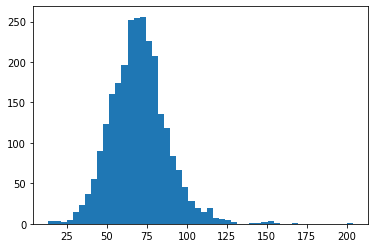

In [ ]:
# distribution
plt.hist(df['Incidence_Rate'],bins=50)
plt.show()

In [ ]:
# recode missing value as column mean
df['Incidence_Rate']=df['Incidence_Rate'].replace(np.nan,df['Incidence_Rate'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   FIPS               2812 non-null   object 
 3   Incidence_Rate     2812 non-null   float64
 4   Avg_Ann_Incidence  2812 non-null   object 
 5   recent_trend       2812 non-null   object 
 6   State              2809 non-null   object 
 7   All_Poverty        2809 non-null   float64
 8   All_With           2809 non-null   float64
 9   Med_Income         2809 non-null   float64
 10  Med_Income_Black   1890 non-null   float64
 11  Med_Income_Nat_Am  1401 non-null   float64
 12  Med_Income_Asian   1359 non-null   float64
 13  Hispanic           2272 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 329.5+ KB


#### FIPS

In [ ]:
# drop FIPS
df=df.drop(['FIPS'],axis=1)

#### Avg_Ann_Incidence
The distribution of average annual incidence rate is strongly right-skewed and has a wide range, ranging from 0 per year to 3500 per year. 


In [ ]:
# Avg_Ann_Incidence
  # recode 3 or fewer to random int [0,3]
df.loc[df['Avg_Ann_Incidence'] == '3 or fewer', 'Avg_Ann_Incidence'] = np.random.randint(0, 3)

df['Avg_Ann_Incidence']=df['Avg_Ann_Incidence'].replace('_',np.nan)
df['Avg_Ann_Incidence']=df['Avg_Ann_Incidence'].replace('__',np.nan)
df['Avg_Ann_Incidence']=df['Avg_Ann_Incidence'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   Incidence_Rate     2812 non-null   float64
 3   Avg_Ann_Incidence  2649 non-null   float64
 4   recent_trend       2812 non-null   object 
 5   State              2809 non-null   object 
 6   All_Poverty        2809 non-null   float64
 7   All_With           2809 non-null   float64
 8   Med_Income         2809 non-null   float64
 9   Med_Income_Black   1890 non-null   float64
 10  Med_Income_Nat_Am  1401 non-null   float64
 11  Med_Income_Asian   1359 non-null   float64
 12  Hispanic           2272 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 307.6+ KB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


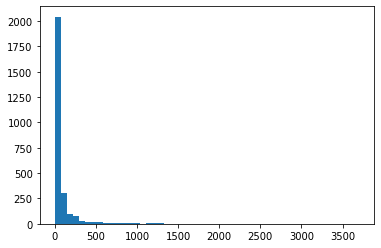

In [ ]:
plt.hist(df['Avg_Ann_Incidence'],bins=50)
plt.show()

In [ ]:
# recode missing value as column mean
df['Avg_Ann_Incidence']=df['Avg_Ann_Incidence'].replace(np.nan,df['Avg_Ann_Incidence'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   Incidence_Rate     2812 non-null   float64
 3   Avg_Ann_Incidence  2812 non-null   float64
 4   recent_trend       2812 non-null   object 
 5   State              2809 non-null   object 
 6   All_Poverty        2809 non-null   float64
 7   All_With           2809 non-null   float64
 8   Med_Income         2809 non-null   float64
 9   Med_Income_Black   1890 non-null   float64
 10  Med_Income_Nat_Am  1401 non-null   float64
 11  Med_Income_Asian   1359 non-null   float64
 12  Hispanic           2272 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 307.6+ KB


#### recent_trend

Cancer incidences are increasing in the U.S. during the 5 years between 2013-2017. Among all the counties across the U.S., 2384 counties has a stable cancer incidence trend, 39 has a rising trend, while only 198 has a falling incidence trend.

In [ ]:
# recent_trend
df['recent_trend'].unique()

df['recent_trend']=df['recent_trend'].replace('*','Unknown')
df['recent_trend']=df['recent_trend'].replace('_','Unknown')
df['recent_trend']=df['recent_trend'].replace('__','Unknown')


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   Incidence_Rate     2812 non-null   float64
 3   Avg_Ann_Incidence  2812 non-null   float64
 4   recent_trend       2812 non-null   object 
 5   State              2809 non-null   object 
 6   All_Poverty        2809 non-null   float64
 7   All_With           2809 non-null   float64
 8   Med_Income         2809 non-null   float64
 9   Med_Income_Black   1890 non-null   float64
 10  Med_Income_Nat_Am  1401 non-null   float64
 11  Med_Income_Asian   1359 non-null   float64
 12  Hispanic           2272 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 307.6+ KB


In [ ]:
# trend distribution
df['recent_trend'].value_counts()

stable     2384
falling     198
Unknown     191
rising       39
Name: recent_trend, dtype: int64

#### State
Among all states, 
* Indiana, Alabama, South Dakota, Wisconsin, and Ohio have the highest average cancer mortality rates, while TEXAS has the lowest average cancer mortality rate.
* California, Texas, New York, and Florida have the largest poverty population, these four states also have the largest population with health insurance. 

In [ ]:
# State
df['State'].value_counts()
df['State'].unique()
temp=df[df['State'].isnull()]
temp

# as 02280 is AK, 46113 is SD, 51917 unknown, recode the corresponding fields
df.at[855,'State']='AK'
df.at[1350,'State']='SD'
df.at[2019,'State']='Unknown'


df['State'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   Incidence_Rate     2812 non-null   float64
 3   Avg_Ann_Incidence  2812 non-null   float64
 4   recent_trend       2812 non-null   object 
 5   State              2812 non-null   object 
 6   All_Poverty        2809 non-null   float64
 7   All_With           2809 non-null   float64
 8   Med_Income         2809 non-null   float64
 9   Med_Income_Black   1890 non-null   float64
 10  Med_Income_Nat_Am  1401 non-null   float64
 11  Med_Income_Asian   1359 non-null   float64
 12  Hispanic           2272 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 387.6+ KB


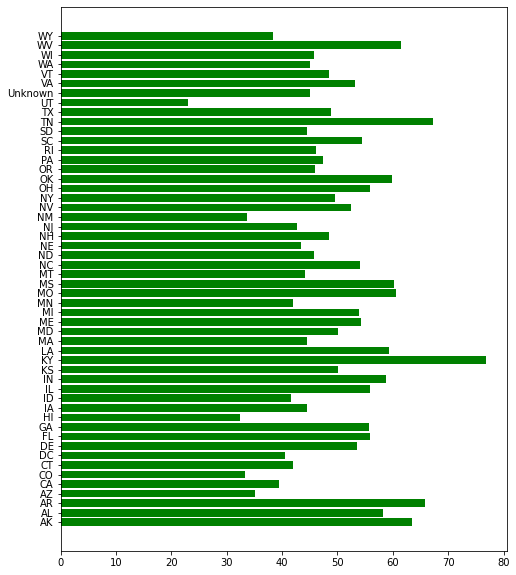

In [ ]:
# which state has the highest avg mortality rate?
fig, ax = plt.subplots(figsize = (8,10))
temp=df.groupby('State')['Mortality_Rate'].mean()
temp = pd.DataFrame(temp)
ax.barh(temp.index, temp['Mortality_Rate'], color='g')
plt.show()

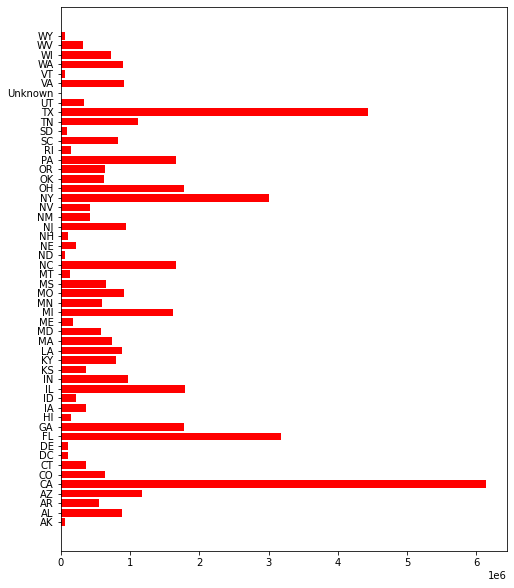

In [ ]:
# which state has most poverty?
fig, ax = plt.subplots(figsize = (8,10))
temp=df.groupby('State')['All_Poverty'].sum()
temp = pd.DataFrame(temp)
ax.barh(temp.index, temp['All_Poverty'], color='r')
plt.show()

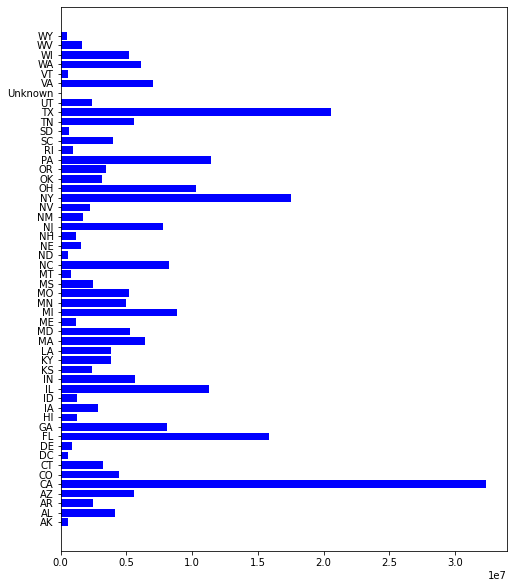

In [ ]:
# which state has most people with health insurance?
fig, ax = plt.subplots(figsize = (8,10))
temp=df.groupby('State')['All_With'].sum()
temp = pd.DataFrame(temp)
ax.barh(temp.index, temp['All_With'], color='b')
plt.show()

#### Rest Columns

In [ ]:
# recode missing values in the rest columns as column mean
df['All_Poverty']=df['All_Poverty'].replace(np.nan,df['All_Poverty'].mean())
df['All_With']=df['All_With'].replace(np.nan,df['All_With'].mean())
df['Med_Income']=df['Med_Income'].replace(np.nan,df['Med_Income'].mean())
df['Med_Income_Black']=df['Med_Income_Black'].replace(np.nan,df['Med_Income_Black'].mean())
df['Med_Income_Nat_Am']=df['Med_Income_Nat_Am'].replace(np.nan,df['Med_Income_Nat_Am'].mean())
df['Med_Income_Asian']=df['Med_Income_Asian'].replace(np.nan,df['Med_Income_Asian'].mean())
df['Hispanic']=df['Hispanic'].replace(np.nan,df['Hispanic'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   Incidence_Rate     2812 non-null   float64
 3   Avg_Ann_Incidence  2812 non-null   float64
 4   recent_trend       2812 non-null   object 
 5   State              2812 non-null   object 
 6   All_Poverty        2812 non-null   float64
 7   All_With           2812 non-null   float64
 8   Med_Income         2812 non-null   float64
 9   Med_Income_Black   2812 non-null   float64
 10  Med_Income_Nat_Am  2812 non-null   float64
 11  Med_Income_Asian   2812 non-null   float64
 12  Hispanic           2812 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 387.6+ KB


In [ ]:
df.describe()

,Mortality_Rate,Avg_Ann_Deaths,Incidence_Rate,Avg_Ann_Incidence,All_Poverty,All_With,Med_Income,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic
count,2812.000000,2812.000000,2812.000000,2812.000000,2.812000e+03,2.812000e+03,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,53.187696,55.782361,70.090734,78.164213,1.692179e+04,9.609857e+04,46812.890352,34797.029630,43422.154889,65459.716703,41144.795775
std,14.035839,127.649139,17.142384,174.818330,5.737122e+04,2.834681e+05,12413.643216,14885.746824,16821.416056,23707.644804,14445.665984
min,9.200000,3.000000,13.500000,1.000000,1.790000e+02,1.901000e+03,19328.000000,2499.000000,2499.000000,2499.000000,2499.000000
25%,43.700000,10.000000,59.400000,15.000000,2.338000e+03,1.243000e+04,38708.500000,26618.750000,39158.000000,61040.250000,33642.500000
50%,52.600000,21.000000,70.090734,32.000000,5.026500e+03,2.611450e+04,45064.000000,34797.029630,43422.154889,65459.716703,41144.795775
75%,61.200000,48.000000,79.200000,78.164213,1.212525e+04,6.769400e+04,52133.250000,34797.029630,43422.154889,65459.716703,44793.000000
max,125.600000,2876.000000,203.700000,3701.000000,1.800265e+06,8.134459e+06,123453.000000,170195.000000,250001.000000,250001.000000,223750.000000


#### correlation check

In [ ]:
# check correlation between variables
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Mortality_Rate,Avg_Ann_Deaths,Incidence_Rate,Avg_Ann_Incidence,All_Poverty,All_With,Med_Income,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic
Mortality_Rate,1.000000,-0.126712,0.845031,-0.143764,-0.145636,-0.187657,-0.447070,-0.229314,-0.029256,-0.025835,-0.093255
Avg_Ann_Deaths,-0.126712,1.000000,-0.090908,0.983928,0.911857,0.955513,0.235406,0.093027,-0.002667,0.048317,0.041524
Incidence_Rate,0.845031,-0.090908,1.000000,-0.091125,-0.125050,-0.154778,-0.371801,-0.202313,-0.021274,-0.020887,-0.080683
Avg_Ann_Incidence,-0.143764,0.983928,-0.091125,1.000000,0.893580,0.940695,0.248107,0.101336,-0.001016,0.051341,0.047180
All_Poverty,-0.145636,0.911857,-0.125050,0.893580,1.000000,0.959288,0.127667,0.055539,-0.018162,0.007274,0.006814
All_With,-0.187657,0.955513,-0.154778,0.940695,0.959288,1.000000,0.270972,0.129021,0.022215,0.064757,0.066678
Med_Income,-0.447070,0.235406,-0.371801,0.248107,0.127667,0.270972,1.000000,0.536676,0.258099,0.244869,0.436244
Med_Income_Black,-0.229314,0.093027,-0.202313,0.101336,0.055539,0.129021,0.536676,1.000000,0.171875,0.196016,0.300752
Med_Income_Nat_Am,-0.029256,-0.002667,-0.021274,-0.001016,-0.018162,0.022215,0.258099,0.171875,1.000000,0.112075,0.156927
Med_Income_Asian,-0.025835,0.048317,-0.020887,0.051341,0.007274,0.064757,0.244869,0.196016,0.112075,1.000000,0.185019


In [ ]:
# dataset for dnn model
df_dnn=pd.get_dummies(df)
df_dnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mortality_Rate        2812 non-null   float64
 1   Avg_Ann_Deaths        2812 non-null   int64  
 2   Incidence_Rate        2812 non-null   float64
 3   Avg_Ann_Incidence     2812 non-null   float64
 4   All_Poverty           2812 non-null   float64
 5   All_With              2812 non-null   float64
 6   Med_Income            2812 non-null   float64
 7   Med_Income_Black      2812 non-null   float64
 8   Med_Income_Nat_Am     2812 non-null   float64
 9   Med_Income_Asian      2812 non-null   float64
 10  Hispanic              2812 non-null   float64
 11  recent_trend_Unknown  2812 non-null   uint8  
 12  recent_trend_falling  2812 non-null   uint8  
 13  recent_trend_rising   2812 non-null   uint8  
 14  recent_trend_stable   2812 non-null   uint8  
 15  State_AK             

# Baseline Models

In [ ]:
# as Avg_Ann_Deaths, Avg_Ann_Incidence, All_Poverty, All_With are highly correlated
# Delete three of them,
# and keep Incidence_Rate
df_lr=df.drop(['Avg_Ann_Deaths','All_Poverty','All_With'],axis=1)
df.info()

df_lr=df_lr.drop(['State'],axis=1)

df_lr=pd.get_dummies(df_lr)

df_lr.shape
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mortality_Rate     2812 non-null   float64
 1   Avg_Ann_Deaths     2812 non-null   int64  
 2   Incidence_Rate     2812 non-null   float64
 3   Avg_Ann_Incidence  2812 non-null   float64
 4   recent_trend       2812 non-null   object 
 5   State              2812 non-null   object 
 6   All_Poverty        2812 non-null   float64
 7   All_With           2812 non-null   float64
 8   Med_Income         2812 non-null   float64
 9   Med_Income_Black   2812 non-null   float64
 10  Med_Income_Nat_Am  2812 non-null   float64
 11  Med_Income_Asian   2812 non-null   float64
 12  Hispanic           2812 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 387.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 0 to 2811
Data columns (total 12 columns):
 

### Data Partition -- 80% train, 20% test

In [ ]:
# target variable Y
y=df_lr['Mortality_Rate']
print(y.shape)

(2812,)


In [ ]:
# potential predictr variables
X=df_lr.drop(['Mortality_Rate'],axis=1)
print(X.shape)

(2812, 11)


In [ ]:
# 80% training, 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2249, 11) (563, 11) (2249,) (563,)


### Variable Selection
9 variables are identified as signficant, they are:
* Incidence_Rate,
* Avg_Ann_Incidence, 
* Med_Income, 
* Med_Income_Nat_Am, 
* Med_Income_Asian, 
* Hispanic, 
* recent_trend_falling, 
* recent_trend_rising,
* recent_trend_stable

In [ ]:
# variable selection:
import statsmodels.api as sm


In [ ]:
cols=list(X_train.columns)
pmax=1
while (len(cols)>0):
  p=[]
  X_1=X_train[cols]
  X_1=sm.add_constant(X_1)
  model=sm.OLS(y_train,X_1).fit()
  p=pd.Series(model.pvalues.values[1:],index=cols)
  pmax=max(p)
  feature_with_p_max=p.idxmax()
  if (pmax>0.05):
    cols.remove(feature_with_p_max)
  else:
    break

feature_selection_BE=cols 
print(feature_selection_BE)
# 9 variables are identified as signficant
# 'Incidence_Rate', 'Avg_Ann_Incidence', 'Med_Income', 'Med_Income_Nat_Am', 
# 'Med_Income_Asian', 'Hispanic', 'recent_trend_falling', 'recent_trend_rising',
# 'recent_trend_stable'

['Incidence_Rate', 'Avg_Ann_Incidence', 'Med_Income', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'recent_trend_falling', 'recent_trend_rising', 'recent_trend_stable']


In [ ]:
# drop unselected variables--2
X_train.info()
X_train=X_train.drop(['Med_Income_Black','recent_trend_Unknown'],axis=1)

X_test=X_test.drop(['Med_Income_Black','recent_trend_Unknown'],axis=1)

print(X_train.shape,X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249 entries, 2209 to 1346
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Incidence_Rate        2249 non-null   float64
 1   Avg_Ann_Incidence     2249 non-null   float64
 2   Med_Income            2249 non-null   float64
 3   Med_Income_Black      2249 non-null   float64
 4   Med_Income_Nat_Am     2249 non-null   float64
 5   Med_Income_Asian      2249 non-null   float64
 6   Hispanic              2249 non-null   float64
 7   recent_trend_Unknown  2249 non-null   uint8  
 8   recent_trend_falling  2249 non-null   uint8  
 9   recent_trend_rising   2249 non-null   uint8  
 10  recent_trend_stable   2249 non-null   uint8  
dtypes: float64(7), uint8(4)
memory usage: 149.3 KB
(2249, 9) (563, 9)


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
# normalize the X data
Scaler=MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_train
X_test=Scaler.transform(X_test)
X_test

array([[0.2891693 , 0.0080405 , 0.16465786, ..., 0.        , 0.        ,
        1.        ],
       [0.3254469 , 0.01340083, 0.19020408, ..., 0.        , 0.        ,
        1.        ],
       [0.27970557, 0.01369863, 0.41159184, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29753277, 0.02297922, 0.30358703, ..., 0.        , 0.        ,
        0.        ],
       [0.35541535, 0.01548541, 0.23467947, ..., 0.        , 0.        ,
        1.        ],
       [0.30126183, 0.16885051, 0.2092581 , ..., 0.        , 0.        ,
        1.        ]])

### Modeling

#### linear regression

Median average income is factor significantly affects cancer mortality rate, the higher the median income is, the lower the cancer mortality rate is.

In [ ]:
# fit the model
from sklearn.linear_model import LinearRegression 
lr=LinearRegression().fit(X_train,y_train)

In [ ]:
# store the predictions
train_preds_lr=lr.predict(X_train)
test_preds_lr=lr.predict(X_test)

In [ ]:
coef_table = pd.DataFrame(['Incidence_Rate',
                            'Avg_Ann_Incidence', 
                            'Med_Income', 
                            'Med_Income_Nat_Am',
                            'Med_Income_Asian', 
                            'Hispanic', 
                            'recent_trend_falling', 
                            'recent_trend_rising', 
                            'recent_trend_stable']).copy()

coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
print(coef_table)


                      0       Coefs
0        Incidence_Rate  122.160566
1     Avg_Ann_Incidence  -12.712997
2            Med_Income  -20.660167
3     Med_Income_Nat_Am    5.486259
4      Med_Income_Asian    3.432664
5              Hispanic    7.542993
6  recent_trend_falling    6.047658
7   recent_trend_rising    2.929137
8   recent_trend_stable    5.024344


#### random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor().fit(X_train,y_train)

In [ ]:
# save predictions
train_preds_rf=rf.predict(X_train)
test_preds_rf=rf.predict(X_test)

#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
# store preds
train_preds_dt=dt.predict(X_train)
test_preds_dt=dt.predict(X_test)

# DNN

 **Methodology in layers and nodes selecting**

As the input nodes are 66 (66 params in X_train), output node is 1 (as it's a regression problem), to avoid overfitting, the nodes in the hidden layers should not exceed 2/3 of the sum of input and output nodes, namely, should not be more than 45 nodes.

At the same time, as the problem is a simple regression question, 1-3 layers would suffice.


For more detail, see: 
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

### Data Partition and normalization

In [ ]:
# Get our X and Y data for the df_dnn data set
y = df_dnn['Mortality_Rate']
X = df_dnn.drop(['Mortality_Rate'],axis=1)

# Print the shapes of X and Y
print(X.shape, y.shape)

(2812, 66) (2812,)


In [ ]:
# Do the min/max normalization
from sklearn import preprocessing

X = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

# Show the statistics of X data
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.00000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,0.018372,0.297533,0.020855,0.009301,0.011583,0.263961,0.192599,0.165345,0.254385,0.174669,0.067923,0.070413,0.013869,0.847795,0.004623,0.023826,0.026671,0.005334,0.019559,0.014225,0.002845,0.000356,0.001067,0.023826,0.053698,0.001422,0.034495,0.010313,0.036273,0.032717,0.024538,0.042319,0.022760,0.004979,0.008535,0.00569,0.029161,0.029161,0.040541,0.028805,0.012447,0.035562,0.008179,0.019915,0.003556,0.007468,0.009246,0.004267,0.022048,0.031294,0.025605,0.011735,0.023471,0.001778,0.016358,0.012447,0.033784,0.070413,0.006046,0.000356,0.045875,0.004979,0.013158,0.025249,0.019559,0.007468
std,0.044431,0.090128,0.047248,0.031871,0.034856,0.119219,0.088766,0.067965,0.095788,0.065291,0.251659,0.255886,0.116969,0.359283,0.067848,0.152535,0.161150,0.072854,0.138504,0.118437,0.053272,0.018858,0.032651,0.152535,0.225462,0.037696,0.182529,0.101046,0.187002,0.177926,0.154739,0.201351,0.149163,0.070396,0.092006,0.07523,0.168287,0.168287,0.197258,0.167288,0.110888,0.185228,0.090085,0.139732,0.059538,0.086110,0.095728,0.065198,0.146867,0.174143,0.157980,0.107712,0.151420,0.042137,0.126872,0.110888,0.180704,0.255886,0.077531,0.018858,0.209251,0.070396,0.113971,0.156908,0.138504,0.086110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002436,0.241325,0.003784,0.001199,0.001295,0.186127,0.143830,0.148116,0.236528,0.140761,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006265,0.297533,0.008378,0.002693,0.002977,0.247164,0.192599,0.165345,0.254385,0.174669,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.015663,0.345426,0.0208

In [ ]:
# Data splitting: 80% training, 20% test
from sklearn.model_selection import train_test_split

# Data holdout
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle=True, 
                                                    random_state=123)

In [ ]:
# Print out the shapes of all data
print("The train shape of X: " + str(X_train.shape))
print("The test shape of X: " + str(X_test.shape))
print("The train shape of Y: " + str(y_train.shape))
print("The test shape of Y: " + str(y_test.shape))
print("The shape of the original dataset: " + str(df_dnn.shape))

The train shape of X: (2249, 66)
The test shape of X: (563, 66)
The train shape of Y: (2249,)
The test shape of Y: (563,)
The shape of the original dataset: (2812, 67)


### Model 1

**Model Description**

The model contains 1 input layer of 66 nodes, 2 hidden layers with 20 and 5 nodes respectively, and an output layer of 1 node. 

We run the model for 1000 epochs with application of an early stopping based on validation mse, and patience of 50 epochs. 

In the end, the model stopps at the 672th epoch, achieving an val_loss(mse) of  40.1168 and an val_mae of 4.4741

In [ ]:
# Show the rows of X training data
X_train.shape[1]

66

In [ ]:
# set seed
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [ ]:
# Set up the model
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()

# Hidden layer 1
model1.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
# Hidden layer 2
model1.add(Dense(5, activation='relu'))
# The output
model1.add(Dense(1, activation='linear'))
# Show the model
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                1340      
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 6         
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# Early stopping callback
from keras.callbacks import EarlyStopping
es_model1 = EarlyStopping(monitor='val_loss', 
                   mode='min',
                   patience=50, # can be adjusted (2, 5, 10, 50, 100...)
                   restore_best_weights = True,
                   verbose=1)

In [ ]:
# Run the model and save as "history"
history_m1 = model1.fit(X_train, y_train, 
                      validation_data=(X_test, y_test),
                      epochs=1000, # can be adjusted
                      batch_size=20, # can be adjusted
                      verbose=1,
                      callbacks=[es_model1])

Epoch 1/1000
113/113 [==============================] - 0s 3ms/step - loss: 3032.0845 - mae: 53.1976 - val_loss: 2962.3931 - val_mae: 52.7794
Epoch 2/1000
113/113 [==============================] - 0s 1ms/step - loss: 2989.4087 - mae: 52.7960 - val_loss: 2889.6560 - val_mae: 52.0862
Epoch 3/1000
113/113 [==============================] - 0s 1ms/step - loss: 2867.3667 - mae: 51.6308 - val_loss: 2711.3005 - val_mae: 50.3459
Epoch 4/1000
113/113 [==============================] - 0s 1ms/step - loss: 2618.1938 - mae: 49.1515 - val_loss: 2386.6572 - val_mae: 47.0115
Epoch 5/1000
113/113 [==============================] - 0s 1ms/step - loss: 2213.6665 - mae: 44.8328 - val_loss: 1906.9865 - val_mae: 41.5910
Epoch 6/1000
113/113 [==============================] - 0s 1ms/step - loss: 1662.7493 - mae: 38.1908 - val_loss: 1308.8376 - val_mae: 33.6519
Epoch 7/1000
113/113 [==============================] - 0s 1ms/step - loss: 1042.2024 - mae: 28.9913 - val_loss: 700.6436 - val_mae: 23.2798
Epoch 8

In [ ]:
# print the weights for each layer
print(model1.layers[0].get_weights())
print(model1.layers[1].get_weights())
print(model1.layers[2].get_weights())

[array([[ 5.6483407e+00, -8.4982216e-02,  5.3304520e+00, ...,
         6.5939622e+00,  5.6990104e+00, -3.0339736e-01],
       [ 4.1277080e+00, -3.0774450e-01,  3.3622112e+00, ...,
         3.6006515e+00,  3.1554639e+00, -2.3605366e-01],
       [-1.1817569e+00,  4.7634270e-02, -2.5762520e+00, ...,
        -3.1901712e+00, -3.6085794e+00,  1.6762288e-01],
       ...,
       [ 4.2794306e-02, -1.0780364e-01, -1.9558810e-02, ...,
        -1.8584085e-01,  1.0276345e-02, -1.7736153e-01],
       [ 7.1516722e-01, -3.5023440e-03,  2.3221795e-01, ...,
         3.8695413e-01, -3.1619573e-01,  1.9845914e-02],
       [-4.7058888e-02, -1.5274905e-01, -2.0290194e-01, ...,
         6.0371188e-03, -6.1964846e-01, -5.1802412e-02]], dtype=float32), array([ 0.07840062, -0.10113402,  0.83577347, -0.12172035,  0.06166998,
        0.3311628 ,  0.87746435,  0.69689393, -0.09318264,  0.77849793,
        0.0991556 ,  0.75345737, -0.13872129,  0.6563907 ,  0.33018067,
        0.5299139 ,  0.7061162 ,  0.14401737, 

In [ ]:
# save our first model and architecture to single file
model1.save("/content/drive/Shared drives/Deep Learning Group 5/Project #1/Saved_DNN_Model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate the saved model
from numpy import loadtxt
from keras.models import load_model
 
## load model
model1_load = load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #1/Saved_DNN_Model1.h5')
## summarize model
model1_load.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                1340      
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 6         
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


### Model 2

**Model Description**

Based on The settings of the 1 st model, we adjusted the following parameters:

1) instead of directly spliting the data into 80% train and 20% test, we applied a 10-fold cross-validation to enhance the stability of the model.

2) in between the original two hidden layers, we added an extra layer with 10 nodes, to see if an additional layer would enhance the model's performance.

3) instead of using the minimal mse as the criteria of loss and early stopping, we shifted to minimal mae.

In the end, the model exhausted the 1000 epochs, and finds the best result in the 563th epoch, with a loss of 4.0096 and a mse of 35.9469

In [ ]:
# shuffle the data
df_dnn_shuffled=df_dnn.sample(frac=1).reset_index(drop=True)
df_dnn_shuffled.head()

,Mortality_Rate,Avg_Ann_Deaths,Incidence_Rate,Avg_Ann_Incidence,All_Poverty,All_With,Med_Income,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,recent_trend_Unknown,recent_trend_falling,recent_trend_rising,recent_trend_stable,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_Unknown,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,48.3,6,70.090734,78.164213,1451.0,7594.0,43421.0,34797.02963,26250.000000,83750.000000,41144.795775,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58.8,16,71.000000,21.000000,3162.0,14149.0,34888.0,34797.02963,11875.000000,65459.716703,21920.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,56.6,15,79.800000,22.000000,2570.0,15348.0,40654.0,37500.00000,41389.000000,65459.716703,26250.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,61.5,7,82.900000,9.000000,1382.0,5985.0,47723.0,34797.02963,43422.154889,65459.716703,24375.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70.2,34,73.600000,36.000000,11781.0,37072.0,34612.0,25317.00000,43422.154889,31765.000000,27438.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# set seed
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [ ]:
# Get our X and Y data for the df_dnn data set
y = df_dnn_shuffled['Mortality_Rate']
X = df_dnn_shuffled.drop(['Mortality_Rate'],axis=1)

# Print the shapes of X and Y
print(X.shape, y.shape)

(2812, 66) (2812,)


In [ ]:
# Do the min/max normalization
from sklearn import preprocessing

X = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

# Show the statistics of X data
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.00000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,0.018372,0.297533,0.020855,0.009301,0.011583,0.263961,0.192599,0.165345,0.254385,0.174669,0.067923,0.070413,0.013869,0.847795,0.004623,0.023826,0.026671,0.005334,0.019559,0.014225,0.002845,0.000356,0.001067,0.023826,0.053698,0.001422,0.034495,0.010313,0.036273,0.032717,0.024538,0.042319,0.022760,0.004979,0.008535,0.00569,0.029161,0.029161,0.040541,0.028805,0.012447,0.035562,0.008179,0.019915,0.003556,0.007468,0.009246,0.004267,0.022048,0.031294,0.025605,0.011735,0.023471,0.001778,0.016358,0.012447,0.033784,0.070413,0.006046,0.000356,0.045875,0.004979,0.013158,0.025249,0.019559,0.007468
std,0.044431,0.090128,0.047248,0.031871,0.034856,0.119219,0.088766,0.067965,0.095788,0.065291,0.251659,0.255886,0.116969,0.359283,0.067848,0.152535,0.161150,0.072854,0.138504,0.118437,0.053272,0.018858,0.032651,0.152535,0.225462,0.037696,0.182529,0.101046,0.187002,0.177926,0.154739,0.201351,0.149163,0.070396,0.092006,0.07523,0.168287,0.168287,0.197258,0.167288,0.110888,0.185228,0.090085,0.139732,0.059538,0.086110,0.095728,0.065198,0.146867,0.174143,0.157980,0.107712,0.151420,0.042137,0.126872,0.110888,0.180704,0.255886,0.077531,0.018858,0.209251,0.070396,0.113971,0.156908,0.138504,0.086110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002436,0.241325,0.003784,0.001199,0.001295,0.186127,0.143830,0.148116,0.236528,0.140761,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006265,0.297533,0.008378,0.002693,0.002977,0.247164,0.192599,0.165345,0.254385,0.174669,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.015663,0.345426,0.0208

In [ ]:
# convert the X,y data into numpy array
X=X.values
y=y.values

In [ ]:
# define a 10-fold cross validation
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,shuffle=True,random_state=1)

In [ ]:
# es_kfold
from keras.callbacks import EarlyStopping
es_kfold=EarlyStopping(monitor='loss',
                       mode='min',
                       patience=50,
                       verbose=1)

In [ ]:
# write a loop to fit the model with 10 folds of splits
cross_validation_scores=[]
epochDF=[]
counter=0
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

for train, test in kfold.split(X,y): # x is the predictors array, y is the target array
  # print counter
  counter=counter+1
  print('Fold Index: ',counter)
  # create the model
  model2 = Sequential()
  # Hidden layer 1
  model2.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
  # Hidden layer 2
  model2.add(Dense(10, activation='relu'))
  # Hidden layer 3
  model2.add(Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
  # The output
  model2.add(Dense(1, activation='linear'))
  # Show the model
  model2.summary()
  # compile the model
  model2.compile(optimizer='rmsprop',
                loss='mae',
                metrics=['mse'])
  # fit the model
  history_model2=model2.fit(X[train],
                          y[train],
                          epochs=1000,
                          batch_size=20,
                          verbose=1,
                          callbacks=[es_kfold])
  # evaluate the model
  scores=model2.evaluate(X[test],y[test],verbose=0)
  # show number of epochs
  number=max(np.array(history_model2.epoch))
  # add the score to the cross_validation_scores box
  cross_validation_scores.append(scores)
  # add epoch number to the epochDF box
  epochDF.append(number)
  # print the epoch number where the model stopped and the metrics scores of the model
  print(scores, number)

Streaming output truncated to the last 5000 lines.
Epoch 520/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3128 - mse: 39.4843
Epoch 521/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3213 - mse: 39.2078
Epoch 522/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3232 - mse: 39.2831
Epoch 523/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3100 - mse: 38.9635
Epoch 524/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3200 - mse: 39.0866
Epoch 525/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3074 - mse: 39.1977
Epoch 526/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3117 - mse: 39.0013
Epoch 527/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3086 - mse: 39.2613
Epoch 528/1000
127/127 [==============================] - 0s 2ms/step - loss: 4.3016 - mse: 39.1589
Epoch 529/1000
127/127 [=========================

In [ ]:
# print the weights for each layer
print(model2.layers[0].get_weights())
print(model2.layers[1].get_weights())
print(model2.layers[2].get_weights())
print(model2.layers[3].get_weights())

[array([[ 4.30657   ,  3.918429  , -0.32206082, ..., -0.23057505,
         4.0391912 , -0.03965262],
       [ 1.7268338 ,  1.426615  ,  0.04880189, ..., -0.07099085,
         1.304667  , -0.18298219],
       [-1.564381  , -3.455772  ,  0.03258948, ..., -0.27963695,
        -1.3000686 , -0.31158194],
       ...,
       [ 0.08383726,  0.21915568, -0.24643767, ...,  0.03465626,
        -0.00836388, -0.07007045],
       [ 0.0778177 , -0.20137095,  0.03196605, ...,  0.17041205,
         0.32035652, -0.07881701],
       [ 0.32654426,  0.2681851 ,  0.08548857, ...,  0.1368428 ,
         0.10889219, -0.0713882 ]], dtype=float32), array([ 0.22054736,  0.17887934, -0.10568698,  0.36890936,  0.4858558 ,
        0.2911369 ,  0.2804756 , -0.07948016,  0.        ,  0.23717448,
       -0.1633817 ,  0.3252386 ,  0.20385037, -0.04033251,  0.19212055,
        0.13017102,  0.49337253, -0.13538563,  0.35723534, -0.10332548],
      dtype=float32)]
[array([[ 1.0226419 , -0.28096625,  0.7558706 ,  0.2570323 

In [ ]:
# save our second model and architecture to single file
model2.save("/content/drive/Shared drives/Deep Learning Group 5/Project #1/Saved_DNN_Model2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate the saved model
## load model
model2_load = load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #1/Saved_DNN_Model2.h5')
## summarize model
model2_load.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 20)                1340      
_________________________________________________________________
dense_67 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_68 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 6         
Total params: 1,611
Trainable params: 1,611
Non-trainable params: 0
_________________________________________________________________


# Results and Discussion: 
## Model Comparison (Plots and Matrices)

In conclusion, based on the MAE and MSE, the DNN model2 performs better than the baseline Linear Regression Model. For further detail, see blocks below: 

### Baseline Models: 

r square
* Train R2 linear regression 0.7512410662656435
* Test R2 linear regression 0.7223664623407002
* Train R2 random forest 0.9632769395369065
* Test R2 random forest 0.7078541591178249
* Train R2 decision tree 1.0
* Test R2 decision tree 0.534880593877981

mae
* Train MAE linear regression 5.158769907562376
* Test MAE linear regression 4.866744670061307
* Train MAE random forest 1.9638843930635816
* Test MAE random forest 5.026317939609237
* Train MAE decision tree 0.0
* Test MAE decision tree 6.687033747779751

mse
* Train MSE linear regression 50.24359778945709
* Test MSE linear regression 49.06465777806455
* Train MSE random forest 7.417215742996876
* Test MSE random forest 51.62933781349913
* Train MSE decision tree 0.0
* Test MSE decision tree 82.19801065719359

Analysis:
In terms of R2, MAE, MSE in the training set, linear regression does a better job than the other two models. At the same time, the R2, MAE, MSE in the test set are close to those in the training set, the model is not overfitting on the training data.
Therefore, we choose the Linear Regression model as our baseline model. 


#### linear regression

In [ ]:
# R-square
from sklearn.metrics import r2_score
  # train set
print('Train R2 linear regression',r2_score(y_train,train_preds_lr))
  # test set
print('Test R2 linear regression', r2_score(y_test,test_preds_lr))

Train R2 linear regression 0.7512410662656435
Test R2 linear regression 0.7223664623407002


In [ ]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
  # train set
print('Train MAE linear regression',mean_absolute_error(y_train,train_preds_lr))
  # test set
print('Test MAE linear regression',mean_absolute_error(y_test,test_preds_lr))

Train MAE linear regression 5.158769907562376
Test MAE linear regression 4.866744670061307


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
  # train set
print('Train MSE linear regression',mean_squared_error(y_train,train_preds_lr))
  # test set
print('Test MSE linear regression', mean_squared_error(y_test,test_preds_lr))

Train MSE linear regression 50.24359778945709
Test MSE linear regression 49.06465777806455


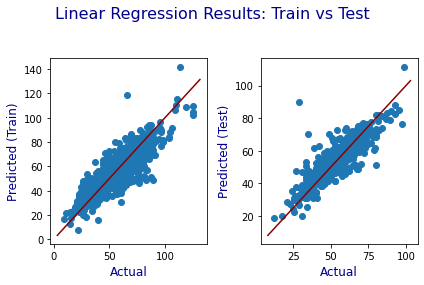

In [ ]:
# scatterplots


# dimension of the figure
fig,axes=plt.subplots(1,2)


fig.suptitle('Linear Regression Results: Train vs Test', 
             fontsize=16, 
             color='Darkblue')

# plot 1: training set
axes[0].scatter(x=y_train,y=train_preds_lr)
axes[0].set_xlabel('Actual',fontsize=12, color='Darkblue')
axes[0].set_ylabel('Predicted (Train)',fontsize=12,color='Darkblue')
  
  # add diagonal line
x=np.linspace(*axes[0].get_xlim())
axes[0].plot(x,x,color='Darkred')

# plot 2: test set
axes[1].scatter(x=y_test,y=test_preds_lr)
axes[1].set_xlabel('Actual',fontsize=12, color='Darkblue')
axes[1].set_ylabel('Predicted (Test)',fontsize=12,color='Darkblue')
  
  # add diagonal line
x=np.linspace(*axes[1].get_xlim())
axes[1].plot(x,x,color='Darkred')

# layout
fig.tight_layout()

fig.subplots_adjust(top=0.8)

# show plot
plt.show()


#### random forest

In [ ]:
# R-square

  # train set
print('Train R2 random forest',r2_score(y_train,train_preds_rf))
  # test set
print('Test R2 random forest', r2_score(y_test,test_preds_rf))

Train R2 random forest 0.96474149301554
Test R2 random forest 0.7120127985354776


In [ ]:
# mean absolute error

  # train set
print('Train MAE random forest',mean_absolute_error(y_train,train_preds_rf))
  # test set
print('Test MAE random forest',mean_absolute_error(y_test,test_preds_rf))

Train MAE random forest 1.9572080924855468
Test MAE random forest 4.991628774422736


In [ ]:
# MSE

  # train set
print('Train MSE random forest',mean_squared_error(y_train,train_preds_rf))
  # test set
print('Test MSE random forest', mean_squared_error(y_test,test_preds_rf))

Train MSE random forest 7.121409538906163
Test MSE random forest 50.8944041971581


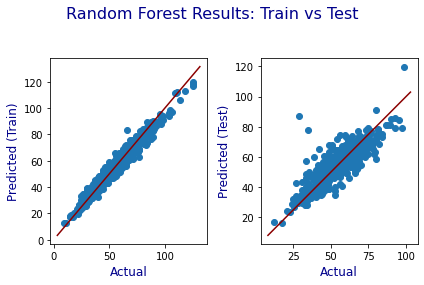

In [ ]:
# scatterplots


# dimension of the figure
fig,axes=plt.subplots(1,2)


fig.suptitle('Random Forest Results: Train vs Test', 
             fontsize=16, 
             color='Darkblue')

# plot 1: training set
axes[0].scatter(x=y_train,y=train_preds_rf)
axes[0].set_xlabel('Actual',fontsize=12, color='Darkblue')
axes[0].set_ylabel('Predicted (Train)',fontsize=12,color='Darkblue')
  
  # add diagonal line
x=np.linspace(*axes[0].get_xlim())
axes[0].plot(x,x,color='Darkred')

# plot 2: test set
axes[1].scatter(x=y_test,y=test_preds_rf)
axes[1].set_xlabel('Actual',fontsize=12, color='Darkblue')
axes[1].set_ylabel('Predicted (Test)',fontsize=12,color='Darkblue')
  
  # add diagonal line
x=np.linspace(*axes[1].get_xlim())
axes[1].plot(x,x,color='Darkred')

# layout
fig.tight_layout()

fig.subplots_adjust(top=0.8)

# show plot
plt.show()


#### decision tree

In [ ]:
# R-square

  # train set
print('Train R2 decision tree',r2_score(y_train,train_preds_dt))
  # test set
print('Test R2 decision tree', r2_score(y_test,test_preds_dt))

Train R2 decision tree 1.0
Test R2 decision tree 0.5132404085326385


In [ ]:
# mean absolute error

  # train set
print('Train MAE decision tree',mean_absolute_error(y_train,train_preds_dt))
  # test set
print('Test MAE decision tree',mean_absolute_error(y_test,test_preds_dt))

Train MAE decision tree 0.0
Test MAE decision tree 6.8097690941385425


In [ ]:
# MSE

  # train set
print('Train MSE decision tree',mean_squared_error(y_train,train_preds_dt))
  # test set
print('Test MSE decision tree', mean_squared_error(y_test,test_preds_dt))

Train MSE decision tree 0.0
Test MSE decision tree 86.02236234458258


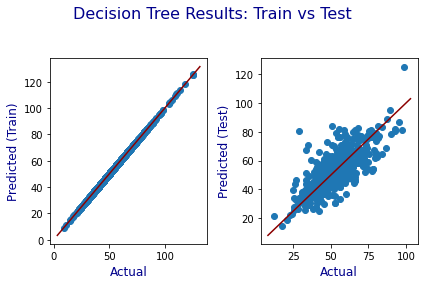

In [ ]:
# scatterplots


# dimension of the figure
fig,axes=plt.subplots(1,2)


fig.suptitle('Decision Tree Results: Train vs Test', 
             fontsize=16, 
             color='Darkblue')

# plot 1: training set
axes[0].scatter(x=y_train,y=train_preds_dt)
axes[0].set_xlabel('Actual',fontsize=12, color='Darkblue')
axes[0].set_ylabel('Predicted (Train)',fontsize=12,color='Darkblue')
  
  # add diagonal line
x=np.linspace(*axes[0].get_xlim())
axes[0].plot(x,x,color='Darkred')

# plot 2: test set
axes[1].scatter(x=y_test,y=test_preds_dt)
axes[1].set_xlabel('Actual',fontsize=12, color='Darkblue')
axes[1].set_ylabel('Predicted (Test)',fontsize=12,color='Darkblue')
  
  # add diagonal line
x=np.linspace(*axes[1].get_xlim())
axes[1].plot(x,x,color='Darkred')

# layout
fig.tight_layout()

fig.subplots_adjust(top=0.8)

# show plot
plt.show()


### Dense Neural Network

Model1 stopps at the 672th epoch, achieving an val_loss(mse) of  40.1168 and an val_mae of 4.4741

The best result for model2 comes in epoch 563, achieving a mae of 4.0096 and a mse of 35.9469. In addition, the Average MAE for all models is 4.72, the standard deviation of MAE is 0.2, indicating that the model 2's performance is stable. 

Therefore, in comparison, model2 is slightly better than model1, in terms of robustness

#### model 1

In [ ]:
# Display metrices of error
history_dict = history_m1.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

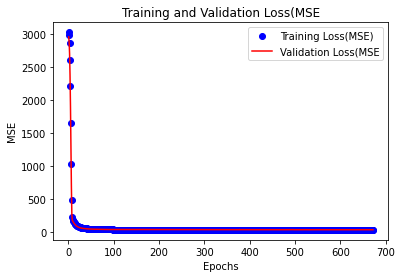

In [ ]:
# loss plot curve by epoch

loss = history_dict['loss'] # can change to other metrices
val_loss = history_dict['val_loss'] # can change to other metrices
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss(MSE)')
plt.plot(epochs, val_loss, 'red', label='Validation Loss(MSE')
plt.title('Training and Validation Loss(MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# Show the results of the history
result = pd.DataFrame(history_dict)
result.head()

,loss,mae,val_loss,val_mae
0,3032.084473,53.197647,2962.393066,52.779388
1,2989.408691,52.795963,2889.656006,52.086205
2,2867.366699,51.630764,2711.300537,50.345913
3,2618.193848,49.151451,2386.657227,47.011524
4,2213.666504,44.832775,1906.986450,41.591011


In [ ]:
# Check the one with mimimum validation Loss(MSE)
result.loc[result['val_loss'] == min(result['val_loss'])]

,loss,mae,val_loss,val_mae
621,37.676208,4.436457,39.684315,4.441879


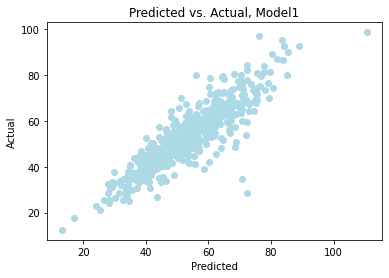

In [ ]:
# Plot the predicted results
preds = model1.predict(X_test)
actual = y_test

plt.scatter(preds, actual, c='lightblue')
plt.title("Predicted vs. Actual, Model1")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Show loss (MSE) and MAE in the test set
val_results = model1.evaluate(X_test, y_test,
                              batch_size=1,
                             verbose=1)
val_results

563/563 [==============================] - 1s 1ms/step - loss: 39.6843 - mae: 4.4419


[39.684303283691406, 4.441880226135254]

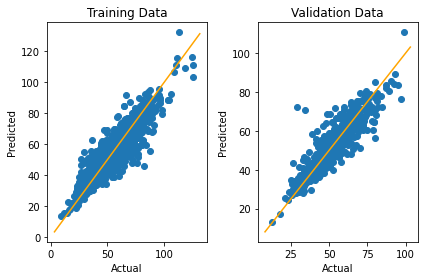

In [ ]:
# Make a scatterplot of actual vs. predicted
fig, axes = plt.subplots(1,2)

# Training Results
axes[0].scatter(x=y_train, y=model1.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training Data")
# Add a 45 degree line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='orange')
# Validation results
axes[1].scatter(x=y_test, y=model1.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation Data")
# Also add a 45 degree line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='orange')

# Tight layout
fig.tight_layout()

# Show the plot
plt.show()

#### model 2

In [ ]:
# Display metrices of error
history_dict = history_model2.history
history_dict.keys()

dict_keys(['loss', 'mse'])

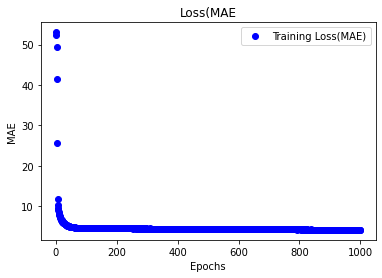

In [ ]:
# loss curve by epoch

loss = history_dict['loss'] # can change to other metrices
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss(MAE)')
plt.title('Loss(MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

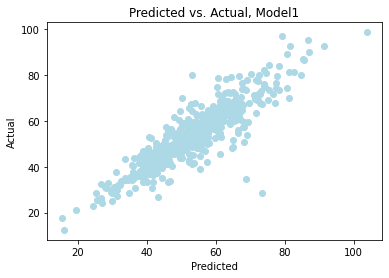

In [ ]:
# Plot the predicted results
preds = model2.predict(X_test)
actual = y_test

plt.scatter(preds, actual, c='lightblue')
plt.title("Predicted vs. Actual, Model1")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Show loss (MAE) and MSE in the test set
val_results = model2.evaluate(X_test, y_test,
                              batch_size=1,
                             verbose=1)
val_results

563/563 [==============================] - 1s 1ms/step - loss: 3.9369 - mse: 35.0398


[3.936905860900879, 35.039817810058594]

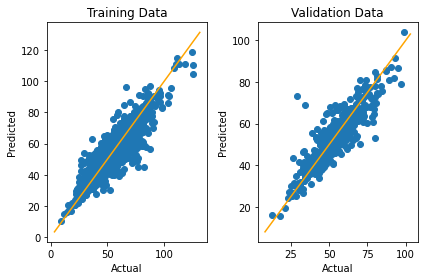

In [ ]:
# Make a scatterplot of actual vs. predicted
fig, axes = plt.subplots(1,2)

# Training Results
axes[0].scatter(x=y_train, y=model2.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training Data")
# Add a 45 degree line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='orange')
# Validation results
axes[1].scatter(x=y_test, y=model2.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation Data")
# Also add a 45 degree line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='orange')

# Tight layout
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# show the indexes for all records in train
print(train.shape)
print(X[train].shape)
train 

(2531,)
(2531, 66)


array([   0,    1,    2, ..., 2809, 2810, 2811])

In [ ]:
# show indexes for all records in test
print(test.shape)
print(X[test].shape)
test

(281,)
(281, 66)


array([  15,   20,   25,   63,   77,   86,   96,  100,  109,  129,  143,
        144,  145,  150,  152,  155,  183,  222,  235,  243,  252,  253,
        266,  269,  290,  313,  316,  319,  324,  327,  357,  376,  391,
        405,  413,  423,  431,  450,  451,  461,  465,  469,  475,  489,
        497,  505,  515,  524,  532,  542,  545,  562,  564,  566,  591,
        606,  609,  617,  624,  626,  633,  637,  648,  656,  668,  687,
        690,  695,  696,  706,  714,  715,  717,  727,  728,  753,  806,
        811,  832,  843,  865,  869,  871,  878,  879,  882,  883,  884,
        889,  901,  905,  910,  928,  949,  960,  964, 1019, 1031, 1046,
       1049, 1052, 1061, 1067, 1072, 1075, 1095, 1096, 1099, 1110, 1111,
       1137, 1150, 1155, 1160, 1175, 1187, 1191, 1202, 1214, 1235, 1258,
       1275, 1277, 1278, 1288, 1295, 1300, 1303, 1306, 1311, 1312, 1321,
       1324, 1327, 1337, 1345, 1350, 1360, 1366, 1372, 1393, 1411, 1425,
       1431, 1455, 1478, 1484, 1485, 1486, 1492, 14

In [ ]:
# save the lists of cross_validation_scores and epochDF 
# that are created from the loop
# into one dataframe
resultDF_kfold=pd.DataFrame(cross_validation_scores)
  # add in epochDF
resultDF_kfold['epochs']=epochDF
  # change the column names
resultDF_kfold.columns=['loss(mae)','mse','epochs']
# check the resultDF_kfold dataframe that we just created
resultDF_kfold

,loss(mae),mse,epochs
0,4.685905,49.924187,999
1,4.711590,45.435715,999
2,4.495704,39.149193,999
3,4.706127,37.121449,999
4,4.934564,44.195938,999
5,5.236329,47.653427,999
6,4.571404,40.825352,842
7,4.451032,36.708477,999
8,4.822331,60.402142,999
9,4.695762,45.154121,999


In [ ]:
# calculate the average statistics/metrics, 
# which tells how stable the models are

# caluculate the average MAE
print('average MAE: ',round(np.mean(resultDF_kfold['loss(mae)']),2))
# standard deviation of MAE
print('sdv of MAE: ',round(np.std(resultDF_kfold['loss(mae)']),2))
# average number of epochs at stopping point
print('average epochs: ',np.mean(resultDF_kfold['epochs']))


average MAE:  4.73
sdv of MAE:  0.22
average epochs:  983.3


# Conclusion:

* The regression Model shows that, median average income significantly affects cancer mortality rate, the higher the median income is, the lower the cancer mortality rate is.
* Among the three baseline models built (regression, decision tree, random forests), the regression model performs the best, achieving a validation mae of 4.87, and a validation mse of 49. 
* In general, The DNN models has done a better job than the baseline linear regression models (though the performance of the latter is also decent) in predicting the average cancer mortality rate.
* Between the two DNN models (for specific description of the two models and methods adopted in building the two models, please refer to the respective block), the second model (with 10-fold cross validation applied) performs better, achiving a mae of 4.0096, and a mse of 35.9469, which is the best among all of the models built. At the same time, the models also achieve good stability, with an standard deviation of MAE of 0.2.
* In building the DNN models, the (2/3)* (input nodes+output nodes) rule applies to our data well, while adding one extra layer helps improve the general performance of the model. 